In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X shape: (500, 2)
labels shape: (500,)
Number of samples: 500


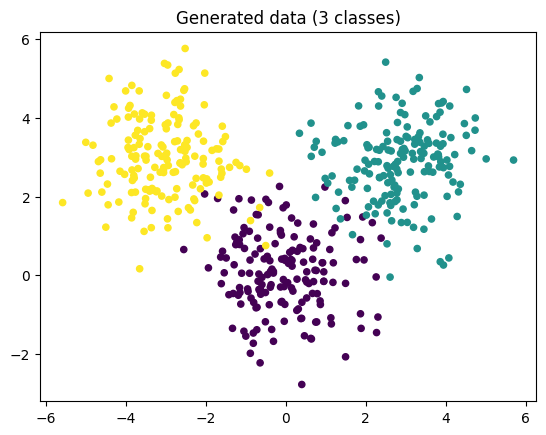

In [2]:
num_samples = 500
num_classes = 3

centers = [
    [0, 0],
    [3, 3],
    [-3, 3],
]

base = num_samples // num_classes
remainder = num_samples - base*num_classes

X_list = []
labels_list = []

for class_idx in range(num_classes):
    n_points = base + (1 if class_idx < remainder else 0)

    Xc = np.random.randn(n_points, 2) + np.array(centers[class_idx])
    yc = np.full(n_points, class_idx)

    X_list.append(Xc)
    labels_list.append(yc)

X = np.vstack(X_list)
labels = np.hstack(labels_list)

print("X shape:", X.shape)
print("labels shape:", labels.shape)
print("Number of samples:", X.shape[0])

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=20)
plt.title("Generated data (3 classes)")
plt.show()

In [3]:
num_samples = X.shape[0]
num_classes = 3

Y = np.zeros((num_samples, num_classes))
Y[np.arange(num_samples), labels] = 1

print("Y shape (one-hot):", Y.shape)
print("First 5 labels:", labels[:5])
print("First 5 one-hot rows:\n", Y[:5])

Y shape (one-hot): (500, 3)
First 5 labels: [0 0 0 0 0]
First 5 one-hot rows:
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [4]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons   = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 10
        outLayerNeurons     = 3

        self.learning_rate = 0.05

        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_OH = np.random.randn(hiddenLayer2Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        h1_input = np.dot(X, self.W_H1)
        self.h1_output = self.sigmoid(h1_input)

        h2_input = np.dot(self.h1_output, self.W_H2)
        self.h2_output = self.sigmoid(h2_input)

        out_input = np.dot(self.h2_output, self.W_OH)
        pred = self.sigmoid(out_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        h2_error = output_delta.dot(self.W_OH.T)
        h2_delta = self.learning_rate * h2_error * self.sigmoid(self.h2_output, der=True)

        h1_error = h2_delta.dot(self.W_H2.T)
        h1_delta = self.learning_rate * h1_error * self.sigmoid(self.h1_output, der=True)

        self.W_OH += self.h2_output.T.dot(output_delta)
        self.W_H2 += self.h1_output.T.dot(h2_delta)
        self.W_H1 += X.T.dot(h1_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def predict_class(self, X):
        probs = self.feedForward(X)
        return np.argmax(probs, axis=1)

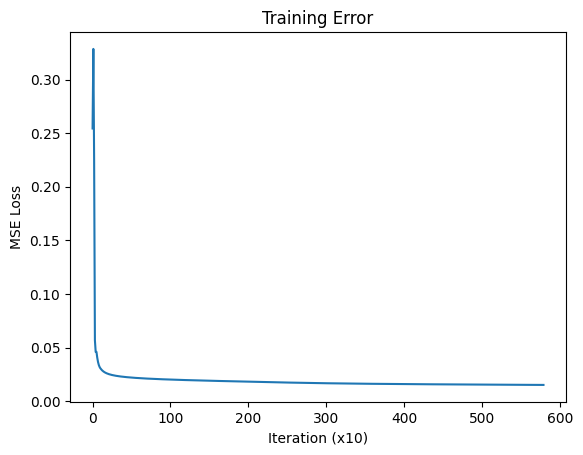

In [7]:
NN = NeuralNetwork()

err = []
epochs = 5000

for i in range(epochs):
    NN.train(X, Y)

    if i % 10 == 0:
        pred = NN.feedForward(X)
        mse = np.mean(np.square(Y - pred))
        err.append(mse)

plt.plot(err)
plt.xlabel("Iteration (x10)")
plt.ylabel("MSE Loss")
plt.title("Training Error")
plt.show()

Training accuracy: 0.966


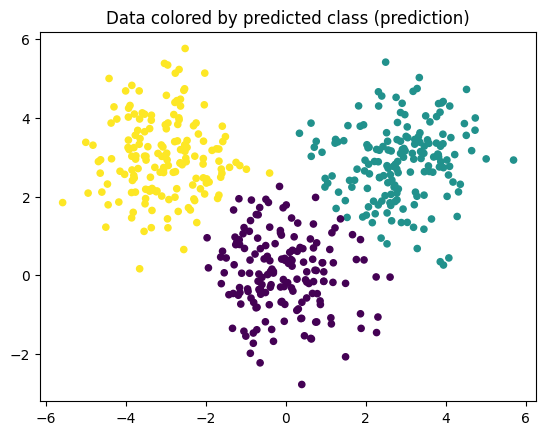

In [8]:
y_pred = NN.predict_class(X)

accuracy = np.mean(y_pred == labels)
print("Training accuracy:", accuracy)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis', s=20)
plt.title("Data colored by predicted class (prediction)")
plt.show()